In [29]:
from tensorflow.keras.applications.efficientnet import EfficientNetB6
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

import IPython

## Download the EfficientNet Model

In [3]:
model = EfficientNetB6(weights='imagenet')

2023-04-24 10:20:07.260767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 10:20:07.262710: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Display the model summary.

In [4]:
model.summary()

Model: "efficientnetb6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 528, 528, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 528, 528, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 528, 528, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 528, 528, 3)  0           ['normalization[0][0

 block1c_dwconv (DepthwiseConv2  (None, 264, 264, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 264, 264, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 264, 264, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePoolin

                                                                                                  
 block2b_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2b_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2b_activation (Activation  (None, 132, 132, 24  0          ['block2b_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2b_s

 D)                             0)                               ']                               
                                                                                                  
 block2d_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2d_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2d_activation (Activation  (None, 132, 132, 24  0          ['block2d_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2d_se_squeeze (GlobalAver  (None, 240)         0           ['block2d_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2f_dwconv (DepthwiseConv2  (None, 132, 132, 24  2160       ['block2f_expand_activation[0][0]
 D)                             0)                               ']                               
                                                                                                  
 block2f_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2f_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2f_activation (Activation  (None, 132, 132, 24  0          ['block2f_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2f_se_squeeze (GlobalAver  (None, 240)         0           ['block2f_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 66, 66, 432)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 432)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block3d_se_squeeze (GlobalAver  (None, 432)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3d_se_reshape[0][0]']     
                                                                                                  
 block3d_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3d_activation[0][0]',     
          

 block3f_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3f_se_reshape[0][0]']     
                                                                                                  
 block3f_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3f_se_reduce[0][0]']      
                                                                                                  
 block3f_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3f_activation[0][0]',     
                                                                  'block3f_se_expand[0][0]']      
                                                                                                  
 block3f_project_conv (Conv2D)  (None, 66, 66, 72)   31104       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_project_bn (BatchNorma  (None, 66, 66, 72)  288         ['block3f_project_conv[0][0]']   
 lization)

 block4b_project_conv (Conv2D)  (None, 33, 33, 144)  124416      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 33, 33, 144)  576        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 33, 33, 144)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 33, 33, 144)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 block4d_drop (Dropout)         (None, 33, 33, 144)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 33, 33, 144)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_e

 block4g_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 33, 33, 864)  0          ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 33, 33, 864)  7776       ['block4g_expand_activation[0][0]
 D)                                                              ']                               
          

 block5a_expand_activation (Act  (None, 33, 33, 864)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 33, 33, 864)  21600      ['block5a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 33, 33, 864)  3456       ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 33, 33, 864)  0          ['block5a_bn[0][0]']             
 )        

                                                                                                  
 block5c_activation (Activation  (None, 33, 33, 1200  0          ['block5c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1200)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5c_se_reshape[0][0]']     
          

                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1200)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 33, 33, 1200  0           ['block5g_activation[0][0]',     
                                )                                 'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 17, 17, 1200  0           ['block6a_activation[0][0]',     
                                )                                 'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_p

                                )                                 'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 17, 17, 344)  710016      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 17, 17, 344)  0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_add (Add)              (None, 17, 17, 344)  0           ['block6c_drop[0][0]',           
          

                                                                                                  
 block6e_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 17, 17, 344)  0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 17, 17, 344)  0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6e_add[0][0]']            
          

                                                                                                  
 block6g_drop (Dropout)         (None, 17, 17, 344)  0           ['block6g_project_bn[0][0]']     
                                                                                                  
 block6g_add (Add)              (None, 17, 17, 344)  0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6g_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6h_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block6h_expand_conv[0][0]']    
 ization) 

 block6i_add (Add)              (None, 17, 17, 344)  0           ['block6i_drop[0][0]',           
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block6j_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6j_expand_activation (Act  (None, 17, 17, 2064  0          ['block6j_expand_bn[0][0]']      
 ivation) 

 block7a_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block7a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block7a_expand_activation (Act  (None, 17, 17, 2064  0          ['block7a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 17, 17, 2064  18576      ['block7a_expand_activation[0][0]
 D)       

                                                                                                  
 block7c_dwconv (DepthwiseConv2  (None, 17, 17, 3456  31104      ['block7c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block7c_bn (BatchNormalization  (None, 17, 17, 3456  13824      ['block7c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block7c_activation (Activation  (None, 17, 17, 3456  0          ['block7c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7c_s

## Test Model Classification

Import a test elephant, which the pre-trained model is known to have the ability to classify.

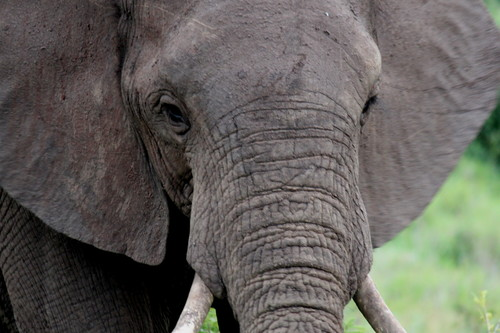

In [10]:
img_path = 'efficientnet_cache/elephant.jpg'
img = image.load_img(img_path, target_size=(528, 528))

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Insert a new axis
x = preprocess_input(x)  # Preprocess image for classification

In [22]:
preds = model.predict(x)

1/1 [==============================] - 1s 772ms/step


In [23]:
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.43313506), ('n01871265', 'tusker', 0.304252), ('n02504013', 'Indian_elephant', 0.041185595)]


## Modify Network to allow for Transfer Learning

In [34]:

def build_efficientnet(classes: int):
    inputs = layers.Input(shape=(528, 528, 3))
    # Construct the pre-trained model
    model = EfficientNetB6(include_top=False, 
                           input_tensor=inputs,
                           weights='imagenet')
    
    # Freeze the pre-trained weights
    model.trainable = False
    
    x = Sequential()
    # Rebuild the top-layers
    x = model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(2048, activation='relu')(x)
    predictions = Dense(classes, activation='softmax')(x)
    
    model = Model(inputs=model.input, outputs=predictions)
    optimizer = Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy", 
                  metrics=['balanced_accuracy'])
    return model

In [37]:
model = build_efficientnet(2)

In [38]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 528, 528, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 528, 528, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 528, 528, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, 264, 264, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 264, 264, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 264, 264, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_s

 D)                             0)                               ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2b_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2b_activation (Activation  (None, 132, 132, 24  0          ['block2b_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2d_dwconv (DepthwiseConv2  (None, 132, 132, 24  2160       ['block2d_expand_activation[0][0]
 D)                             0)                               ']                               
                                                                                                  
 block2d_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2d_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2d_activation (Activation  (None, 132, 132, 24  0          ['block2d_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2d_se_squeeze (GlobalAver  (None, 240)         0           ['block2d_activation[0][0]']     
 agePoolin

                                                                                                  
 block2f_dwconv (DepthwiseConv2  (None, 132, 132, 24  2160       ['block2f_expand_activation[0][0]
 D)                             0)                               ']                               
                                                                                                  
 block2f_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2f_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2f_activation (Activation  (None, 132, 132, 24  0          ['block2f_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2f_s

 block3b_bn (BatchNormalization  (None, 66, 66, 432)  1728       ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 66, 66, 432)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 432)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3b_se_squeeze[0][0]']     
          

                                                                                                  
 block3d_se_squeeze (GlobalAver  (None, 432)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3d_se_reshape[0][0]']     
                                                                                                  
 block3d_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_s

                                                                                                  
 block3f_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3f_se_reshape[0][0]']     
                                                                                                  
 block3f_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3f_se_reduce[0][0]']      
                                                                                                  
 block3f_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3f_activation[0][0]',     
                                                                  'block3f_se_expand[0][0]']      
                                                                                                  
 block3f_project_conv (Conv2D)  (None, 66, 66, 72)   31104       ['block3f_se_excite[0][0]']      
                                                                                                  
 block3f_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 33, 33, 144)  124416      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 33, 33, 144)  576        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 33, 33, 144)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 33, 33, 144)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 33, 33, 144)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 33, 33, 144)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4g_expand_conv (Conv2D)   (None, 33, 33, 864)  124416      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 33, 33, 864)  3456       ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 33, 33, 864)  0          ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 33, 33, 864)  7776       ['block4g_expand_activation[0][0]
 D)       

                                                                                                  
 block5a_expand_activation (Act  (None, 33, 33, 864)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv (DepthwiseConv2  (None, 33, 33, 864)  21600      ['block5a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 33, 33, 864)  3456       ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_a

 )                              )                                                                 
                                                                                                  
 block5c_activation (Activation  (None, 33, 33, 1200  0          ['block5c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1200)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_s

 )                              )                                                                 
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1200)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5e_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 33, 33, 1200  0           ['block5g_activation[0][0]',     
                                )                                 'block5g_se_expand[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6a_se_reshape (Reshape)   (None, 1, 1, 1200)   0           ['block6a_se_squeeze[0][0]']     
                                                                                                  
 block6a_se_reduce (Conv2D)     (None, 1, 1, 50)     60050       ['block6a_se_reshape[0][0]']     
                                                                                                  
 block6a_se_expand (Conv2D)     (None, 1, 1, 1200)   61200       ['block6a_se_reduce[0][0]']      
                                                                                                  
 block6a_se_excite (Multiply)   (None, 17, 17, 1200  0           ['block6a_activation[0][0]',     
                                )                                 'block6a_se_expand[0][0]']      
          

 block6c_se_excite (Multiply)   (None, 17, 17, 2064  0           ['block6c_activation[0][0]',     
                                )                                 'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, 17, 17, 344)  710016      ['block6c_se_excite[0][0]']      
                                                                                                  
 block6c_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6c_drop (Dropout)         (None, 17, 17, 344)  0           ['block6c_project_bn[0][0]']     
                                                                                                  
 block6c_a

 block6e_project_conv (Conv2D)  (None, 17, 17, 344)  710016      ['block6e_se_excite[0][0]']      
                                                                                                  
 block6e_project_bn (BatchNorma  (None, 17, 17, 344)  1376       ['block6e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6e_drop (Dropout)         (None, 17, 17, 344)  0           ['block6e_project_bn[0][0]']     
                                                                                                  
 block6e_add (Add)              (None, 17, 17, 344)  0           ['block6e_drop[0][0]',           
                                                                  'block6d_add[0][0]']            
                                                                                                  
 block6f_e

 lization)                                                                                        
                                                                                                  
 block6g_drop (Dropout)         (None, 17, 17, 344)  0           ['block6g_project_bn[0][0]']     
                                                                                                  
 block6g_add (Add)              (None, 17, 17, 344)  0           ['block6g_drop[0][0]',           
                                                                  'block6f_add[0][0]']            
                                                                                                  
 block6h_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6g_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6h_e

                                                                                                  
 block6i_add (Add)              (None, 17, 17, 344)  0           ['block6i_drop[0][0]',           
                                                                  'block6h_add[0][0]']            
                                                                                                  
 block6j_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6j_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block6j_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6j_e

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 17, 17, 2064  710016      ['block6k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 17, 17, 2064  8256       ['block7a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block7a_expand_activation (Act  (None, 17, 17, 2064  0          ['block7a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block7a_d

 ivation)                       )                                                                 
                                                                                                  
 block7c_dwconv (DepthwiseConv2  (None, 17, 17, 3456  31104      ['block7c_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block7c_bn (BatchNormalization  (None, 17, 17, 3456  13824      ['block7c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block7c_activation (Activation  (None, 17, 17, 3456  0          ['block7c_bn[0][0]']             
 )                              )                                                                 
          